<a href="https://colab.research.google.com/github/Muyikem21/Sunday_INFO5502_Spring2022/blob/main/lab_assignment_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The tenth Lab-assignment (04/28/2022, 50 points in total)

The purpose of this assignment is to practice normal distribution and annotation quality evaluation.

### Question 1 (25 points) 

Cohen's kappa coefficient (κ) is a statistic that is used to measure inter-rater reliability (and also intra-rater reliability) for qualitative (categorical) items. It is generally thought to be a more robust measure than simple percent agreement calculation, as κ takes into account the possibility of the agreement occurring by chance. There is controversy surrounding Cohen's kappa due to the difficulty in interpreting indices of agreement. Some researchers have suggested that it is conceptually simpler to evaluate disagreement between items.

A more detailed description of Kappa agreement can be found on wikipedia: https://en.wikipedia.org/wiki/Cohen%27s_kappa

Here is the dataset we created for a text classification task: https://github.com/unt-iialab/info5502-spring2022/blob/main/datasets/lab10-dataset.csv

The last three columns indicate the annotation on the same sentence by three students respectively. Based on this dataset, please calculate the Cohen's kappa and the Fleiss' kappa using their formulars (Python). Please don't use any existing packages for the implementation. 

In [1]:
!pip install krippendorff




In [5]:
#Import the appropriate packages for the coding.
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
#Reading the data.
data=pd.read_csv('/content/lab10-dataset.csv')
data.head()


,Title of Article,Contributions,Source,Annotation1,Annotation2,Annotation3,Year
0,The measurement of ÒinterdisciplinarityÓ and Ò...,"In this study, we discuss recent advances in t...",JASIST,Algorithms/ Methods Construction or Optimization,Algorithms/ Methods Construction or Optimization,Algorithms/ Methods Construction or Optimization,NaN
1,Innovation adoption: Broadcasting versus virality,broadcasting and virality have similar diffusi...,JASIST,Theory proposal\n,Theory proposal\n,Theory proposal\n,NaN
2,Discovering underlying sensations of human emo...,we report the results of our study on sensatio...,JASIST,Theory proposal\n,Algorithms/ Methods Construction or Optimization,Theory proposal\n,NaN
3,Discovering underlying sensations of human emo...,"in the second part of the paper, we define nov...",JASIST,Theory proposal\n,Theory proposal\n,Theory proposal\n,NaN
4,Discovering underlying sensations of human emo...,we design a method to classify texts into ones...,JASIST,Algorithms/ Methods Construction or Optimization,Model Construction or Optimization,Algorithms/ Methods Construction or Optimization,NaN


In [7]:
label = LabelEncoder()

#The labelling of encoding
label.fit(data['Annotation1'])

# fitting the Annotation 1 data and transforming the annotation 2 & annotation 3
data['label_Annotation1'] = label.transform(data['Annotation1'])
data['label_Annotation2'] = label.transform(data['Annotation2'])
data['label_Annotation3'] = label.transform(data['Annotation3'])
from sklearn.metrics import cohen_kappa_score
#To obtain the pair-wise cohen's kappa score
score1 = cohen_kappa_score(list(data['label_Annotation1'].values), list(data['label_Annotation2'].values))
score2 = cohen_kappa_score(list(data['label_Annotation2'].values), list(data['label_Annotation3'].values))
score3 = cohen_kappa_score(list(data['label_Annotation1'].values), list(data['label_Annotation3'].values))
#Here, we want to obtain the average of all the 3 scores
avg_kappa_score = (score1 + score2 + score3)/3
print("Cohen's kappa score is:", round(avg_kappa_score, 2))

Cohen's kappa score is: 0.54


In [8]:
#We want to determine agreement based on cohen kappa score
if avg_kappa_score < 0.0:
    print("Less than chance agreement")

elif ((avg_kappa_score >= 0.01) & (avg_kappa_score <= 0.20)):
    print("Slight agreement")

elif ((avg_kappa_score >= 0.21) and (avg_kappa_score <= 0.40)):
    print("Fair agreement")

elif ((avg_kappa_score >= 0.41) and (avg_kappa_score <= 0.60)):
    print("Moderate agreement")

elif ((avg_kappa_score >= 0.61) and (avg_kappa_score <= 0.80)):
    print("Substantial agreement")

elif ((avg_kappa_score >= 0.81) and (avg_kappa_score <= 0.99)):
    print("Almost perfect agreement")

Moderate agreement


In [9]:
import krippendorff
data_1 = [list(data['label_Annotation1'].values),
        list(data['label_Annotation2'].values),
        list(data['label_Annotation3'].values)]

#Fleiss kappa score
fleiss_score = krippendorff.alpha(data_1)
print("Fleiss kappa score is:", round(fleiss_score, 2))

Fleiss kappa score is: 0.57


### Question 2 (25 points) 

Normal distribution is the default probability for many real world scenarios. It represents a symmetric distribution where most of the observations cluster around the central peak called as mean of the distribution. A normal distribution can be thought of as a bell curve or Gaussian Distribution which typically has two parameters: mean and standard deviation (SD). The parameter used to measure the variability of observations around the mean is called as standard deviation. The probabilities for values occurring near mean are higher than the values far away from the mean. The parameters of the normal distribution plot defining the shape and the probabilities are mean and standard deviation. The area of the plot between two different points in the normal distribution plot represents the probability of the value occurring between those two points.

Please generate the nromal distribution for the following cases suing Python:

(1) IQ scores (the mean is typically 100, SD = 15)

(2) Marks of students in a class (mean = 60, SD = 20)

(3) Measure of weight (mean = 80 kg, SD = 10)

(4) Measure of blood pressure (mean = 120/80, SD = 20)

(5) Measure of wealth (measurement in money; mean = $50,000 , SD = $100)

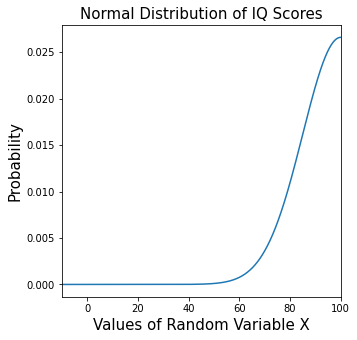

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
# Values of random variable
#
plt.figure(figsize=(5.0, 5.0))
#1
# Normal distribution with mean 100 and std as 15
#
x = np.linspace(-10, 100, 50000)
plt.plot(x, stats.norm(100, 15).pdf(x))
plt.xlim(-10, 100)
plt.title('Normal Distribution of IQ Scores', fontsize='15')
plt.xlabel('Values of Random Variable X', fontsize='15')
plt.ylabel('Probability', fontsize='15')
plt.show()





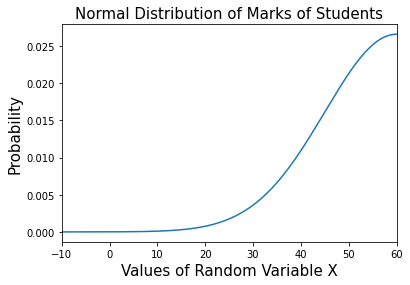

In [ ]:
#2
# Normal distribution with mean 60 and std as 15
plt.plot(x, stats.norm(60, 15).pdf(x))
plt.xlim(-10, 60)
plt.title('Normal Distribution of Marks of Students', fontsize='15')
plt.xlabel('Values of Random Variable X', fontsize='15')
plt.ylabel('Probability', fontsize='15')
plt.show()


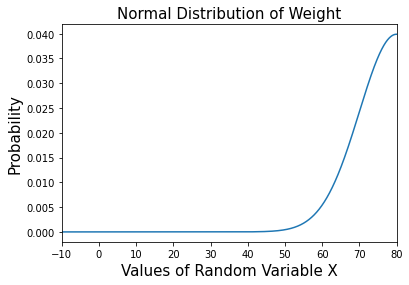

In [ ]:
#3
# Normal distribution with mean 80 and std as 10
plt.plot(x, stats.norm(80, 10).pdf(x))
plt.xlim(-10, 80)
plt.title('Normal Distribution of Weight', fontsize='15')
plt.xlabel('Values of Random Variable X', fontsize='15')
plt.ylabel('Probability', fontsize='15')
plt.show()

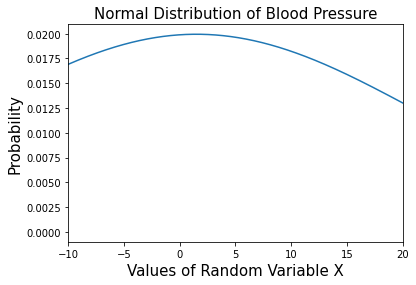

In [ ]:
#4
# Normal distribution with mean 1.5 and std as 20
plt.plot(x, stats.norm(1.5, 20).pdf(x))
plt.xlim(-10, 20)
plt.title('Normal Distribution of Blood Pressure', fontsize='15')
plt.xlabel('Values of Random Variable X', fontsize='15')
plt.ylabel('Probability', fontsize='15')
plt.show()

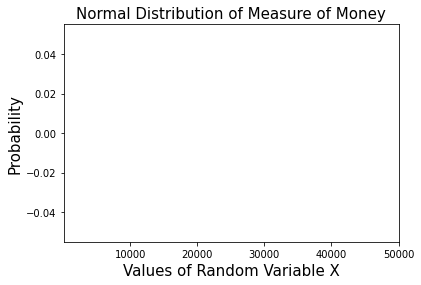

In [ ]:
#5
# Normal distribution with mean 50,000 and std as 100
plt.plot(x, stats.norm(50000, 100).pdf(x))
plt.xlim(100, 50000)
plt.title('Normal Distribution of Measure of Money', fontsize='15')
plt.xlabel('Values of Random Variable X', fontsize='15')
plt.ylabel('Probability', fontsize='15')
plt.show()

One can conclude from the figures that none of them is normally distributed. There is no bell shape observed. considering the fifth question where the mean is 50,000 and SD is 100, the outcome shows that it is impossible to have a distribution with such parameters' values.